In [25]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
#Loading the data by using pandas
df=pd.read_csv("E:\\Datasets\\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
age=df["Age"].mean()
df['Age'].fillna( age, inplace=True)
 
df.head()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Figure size 432x288 with 0 Axes>

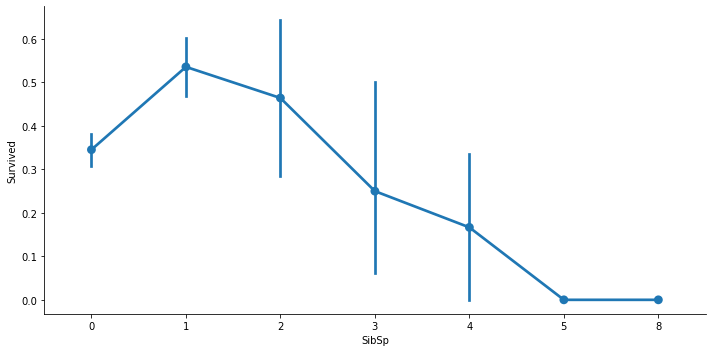

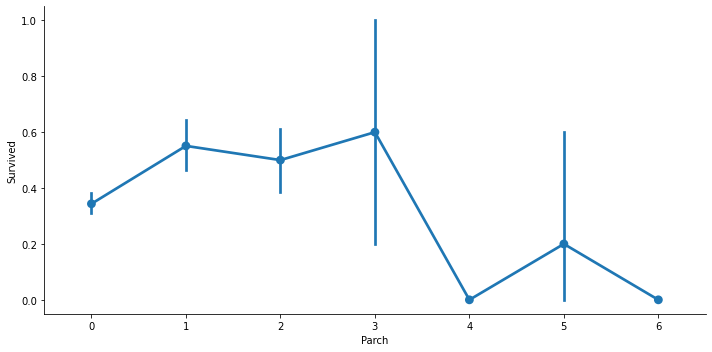

In [5]:

#Combining SibSp and Parch
for i,col in enumerate(['SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col,y='Survived',data=df,kind='point',aspect=2,)

In [6]:
df['Family_cnt']=df['SibSp']+df['Parch']

In [7]:
#Drop unnecessary varaibles
df=df.drop(["PassengerId","SibSp","Parch"],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [8]:
df.groupby(df["Cabin"].isnull())['Survived'].mean()
df['Cabin-indicator']=np.where(df['Survived'].isnull(),0,1)
df.head()
 

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin-indicator
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,1


In [9]:
#Convert Sex to Numeric
gender_num={'male':0,'female':1}
df['Sex']=df["Sex"].map(gender_num)
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin-indicator
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,1


In [10]:
df.drop(['Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)
df.head()
df['Outcome']=df['Survived']
df.drop(['Survived'],axis=1,inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Family_cnt,Cabin-indicator,Outcome
0,3,0,22.0,7.2500,1,1,0
1,1,1,38.0,71.2833,1,1,1
2,3,1,26.0,7.9250,0,1,1
3,1,1,35.0,53.1000,1,1,1
4,3,0,35.0,8.0500,0,1,0


In [11]:
X=df.iloc[:,:-1].values
print(X.shape)
Y=df.iloc[:,-1].values
Y.shape

(891, 6)


(891,)

In [12]:
sc=StandardScaler()
sc.fit(X)
standard_data=sc.transform(X)
X=standard_data
X.shape
Y.shape

(891,)

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.4,random_state=42)
X_test,X_val,Y_test,Y_val=train_test_split(X_test,Y_test, test_size=0.5,random_state=42)


In [14]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape,X_val.shape,Y_val.shape)

(534, 6) (178, 6) (534,) (178,) (179, 6) (179,)


# Logistic Regression Model

Logistic Regression model Test accuracy : 0.7696629213483146
Logistic Regression model Train accuracy : 0.8089887640449438
0.06249499320983887


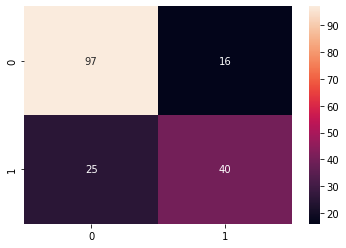

In [15]:
from sklearn.linear_model import LogisticRegression
import joblib
from time import time
start=time()
model=LogisticRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
train_pred=model.predict(X_train)
train_accuracy=accuracy_score(train_pred,Y_train)
test_accuracy=accuracy_score(y_pred,Y_test)
print("Logistic Regression model Test accuracy :",test_accuracy)
print("Logistic Regression model Train accuracy :",train_accuracy)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)
end=time()
print(end-start)

# Support Vector Machine Model


 Support Vector Machine model Test accuracy : 0.8033707865168539
 Support Vector Machine model Train accuracy : 0.8408239700374532
0.11215710639953613


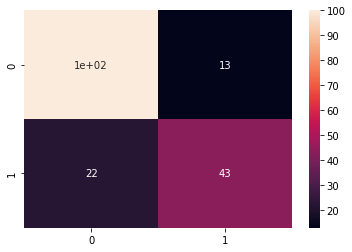

In [16]:
from sklearn.svm import SVC
from time import time
start=time()
model1=SVC()
model1.fit(X_train,Y_train)
svc_y_pred=model1.predict(X_test)
svc_pred=model1.predict(X_train)
svc_train_accuracy=accuracy_score(svc_pred,Y_train)
from sklearn.metrics import accuracy_score
svc_test_accuracy=accuracy_score(svc_y_pred,Y_test)
print(" Support Vector Machine model Test accuracy :",svc_test_accuracy)
print(" Support Vector Machine model Train accuracy :",svc_train_accuracy)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,svc_y_pred)
sns.heatmap(cm,annot=True)
end=time()
print(end-start)

 Random Forest Classifier model Test accuracy : 0.7808988764044944
 Random Forest Classifier model Train accuracy : 0.9831460674157303
0.18584227561950684


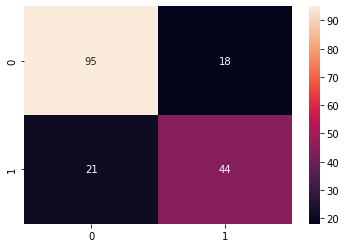

In [17]:
from sklearn.ensemble import RandomForestClassifier
from time import time
start=time()
classifier=RandomForestClassifier(n_estimators=100,max_depth=50)
classifier.fit(X_train,Y_train)
rfc_test_pred=classifier.predict(X_test)
rfc_train_pred=classifier.predict(X_train)
rfc_train_accuracy=accuracy_score(rfc_train_pred,Y_train)
rfc_test_accuracy=accuracy_score(rfc_test_pred,Y_test)
print(" Random Forest Classifier model Test accuracy :",rfc_test_accuracy)
print(" Random Forest Classifier model Train accuracy :",rfc_train_accuracy) 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,rfc_test_pred)
sns.heatmap(cm,annot=True)
end=time()
print(end-start)

 Gradient Boosting Classifier model Test accuracy : 0.7752808988764045
 Gradient Boosting Classifier model Train accuracy : 0.9831460674157303
0.33462977409362793


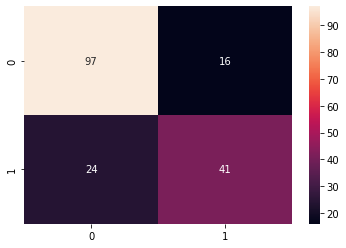

In [18]:
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from time import time
start=time()
classifier1=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=10)
classifier1.fit(X_train,Y_train)
gbc_test_pred=classifier1.predict(X_test)
gbc_train_pred=classifier1.predict(X_train)
gbc_train_accuracy=accuracy_score(gbc_train_pred,Y_train)
gbc_test_accuracy=accuracy_score(gbc_test_pred,Y_test)
print(" Gradient Boosting Classifier model Test accuracy :",gbc_test_accuracy)
print(" Gradient Boosting Classifier model Train accuracy :",gbc_train_accuracy)
end=time()
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,gbc_test_pred)
sns.heatmap(cm,annot=True)
print(end-start)

In [20]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(classifier,X,Y,cv=5)

In [21]:
print(scores)

[0.7877095  0.8258427  0.83146067 0.80337079 0.85393258]
